In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import datasist as ds
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
import matplotlib
import seaborn as sns
# from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import cross_val_score

In [4]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifierCV, Lasso

import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [6]:
# loading our training and testing datasets
path = 'german_data_credit_cat.csv'
credit_data=pd.read_csv(path)

In [7]:
#credit_data.head()

In [8]:
#credit_data.info()

In [9]:
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration in month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Installment rate in percentage of disposable income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Present residence since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Age in years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Number of existing credits at this bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
Number of people being liable to provide maintenance for,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Cost_MatrixRisk,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0


In [10]:
# getting the sizes of the dataset
print("credit_data: ", credit_data.shape)

credit_data:  (1000, 21)





## EDA - Exploratory Data Analysis


In [11]:
# creating helper functions
class DataProcess:
    def __init__(self, df):
        self.df = df
        
    def Numerical(df):
        return df.select_dtypes(include=['int64', 'float64'])
        
    def Categorical(df):
        return df.select_dtypes(include=['object'])
        
    def Missing(df):
        return sns.heatmap(df.isnull(), cbar=False, cmap='viridis'); 
  
    
    def correlation_map(df):
        # Create figure and axes and set figure size
        f, ax = plt.subplots(figsize=(20,10))
        return sns.heatmap(data=df.corr(), annot=False);

In [12]:
# getting numerical and categorical features
categorical_feat = DataProcess.Categorical(credit_data)
numerical_feat = DataProcess.Numerical(credit_data)

In [13]:
#Checking the null values
credit_data.isnull().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              2
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age in years                                                0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

Text(0.5, 1.0, 'heatmap for categorical features \n')

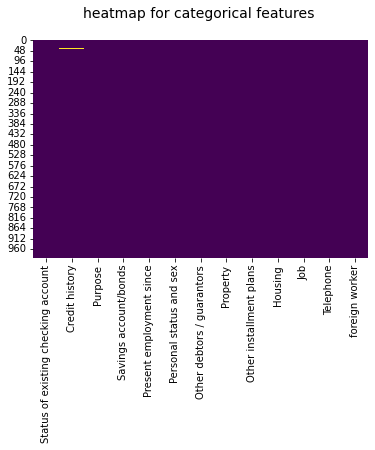

In [14]:
# plotting a heatmap for categorical features with missing values
DataProcess.Missing(categorical_feat);
plt.title('heatmap for categorical features \n', fontsize=14)

Text(0.5, 1.0, 'heatmap for categorical features \n')

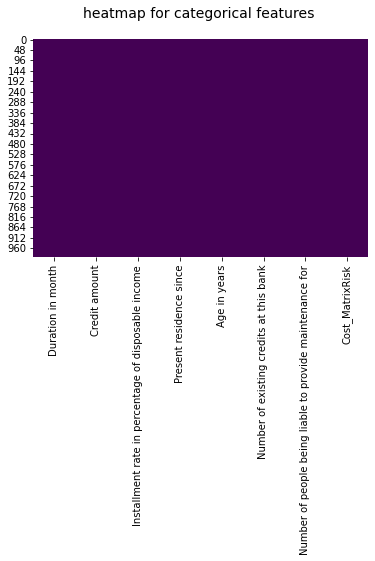

In [15]:
# plotting a heatmap for numerical features with missing values
DataProcess.Missing(numerical_feat);
plt.title('heatmap for categorical features \n', fontsize=14)

In [16]:
# dropping null values
credit_data = credit_data.dropna()
print("Null values State: ", credit_data.isna().sum().any())
credit_data.head()

Null values State:  False


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost_MatrixRisk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [17]:
# class distribution of target
credit_data['Cost_MatrixRisk'].value_counts()

1    698
0    300
Name: Cost_MatrixRisk, dtype: int64

In [18]:
# The classes are heavily skewed we need to solve this issue later.
print('Non-frauds', round(credit_data['Cost_MatrixRisk'].value_counts()[1]/len(credit_data) * 100,2), '% of the dataset')
print('Frauds', round(credit_data['Cost_MatrixRisk'].value_counts()[0]/len(credit_data) * 100,2), '% of the dataset')

Non-frauds 69.94 % of the dataset
Frauds 30.06 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (Cost Risks 0 : Frauds || Cost Risks 1 : No Frauds)')

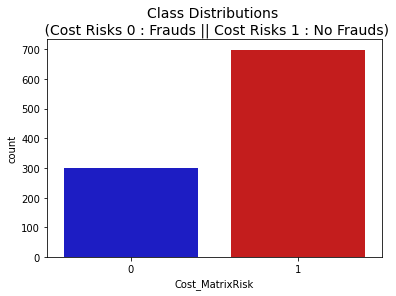

In [19]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Cost_MatrixRisk', data=credit_data, palette=colors)
plt.title('Class Distributions \n (Cost Risks 0 : Frauds || Cost Risks 1 : No Frauds)', fontsize=14)

Text(0.5, 1.0, 'Class Distributions \n')

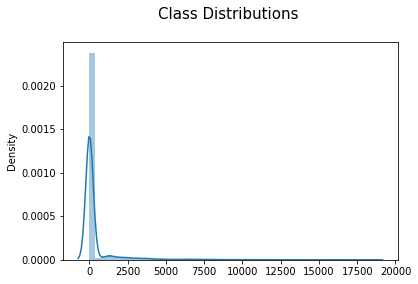

In [20]:
# plotting the distribution for our numerical features
sns.distplot(numerical_feat)
plt.title('Class Distributions \n', fontsize=15)

In [21]:
# checking the distribution of our numerical features
from scipy.stats import skew

def skewness_df(df):
  numeric_feats = df.dtypes[df.dtypes != "object"].index
  # Check the skew of all numerical features
  skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
  print("\nSkew in numerical features: \n")
  skewness = pd.DataFrame({'Skew' :skewed_feats})
  skewnessgreat = skewness[abs(skewness) > 0.75]
  print("There are {} skewed numerical features to Box Cox transform".format(skewnessgreat.shape[0]))
  return skewed_feats, skewness, skewnessgreat

skewed_feats, skewness, skewnessgreat = skewness_df(credit_data)


Skew in numerical features: 

There are 8 skewed numerical features to Box Cox transform


In [22]:
# checking features with skewness
skewed_feats

Credit amount                                               1.945021
Number of people being liable to provide maintenance for    1.903307
Number of existing credits at this bank                     1.267759
Duration in month                                           1.093818
Age in years                                                1.016780
Present residence since                                    -0.273568
Installment rate in percentage of disposable income        -0.527398
Cost_MatrixRisk                                            -0.869751
dtype: float64

In [23]:
corr = credit_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Cost_MatrixRisk
Duration in month,1.000000,0.625079,0.075085,0.034821,-0.036823,-0.011463,-0.023957,-0.215032
Credit amount,0.625079,1.000000,-0.270470,0.028836,0.031577,0.019876,0.016584,-0.154018
Installment rate in percentage of disposable income,0.075085,-0.270470,1.000000,0.049935,0.059738,0.022997,-0.070491,-0.073703
Present residence since,0.034821,0.028836,0.049935,1.000000,0.266438,0.089255,0.042396,-0.002559
Age in years,-0.036823,0.031577,0.059738,0.266438,1.000000,0.148360,0.117652,0.092212
Number of existing credits at this bank,-0.011463,0.019876,0.022997,0.089255,0.148360,1.000000,0.109136,0.046701
Number of people being liable to provide maintenance for,-0.023957,0.016584,-0.070491,0.042396,0.117652,0.109136,1.000000,0.003579
Cost_MatrixRisk,-0.215032,-0.154018,-0.073703,-0.002559,0.092212,0.046701,0.003579,1.000000


## Feature preprocessing

Here we are going to preprocess our features by encoding our categorical features as well as scalling our numerical features before applying modelling techniques

we are also going to look into the balancing our target variable one is by doing it manually then later on try out hybrid mechanissm like using SMOTE oversamppling techniques

In [24]:
categorical_feat


,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,foreign worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A172,A191,A201
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A174,A192,A201
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A173,A191,A201
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A173,A192,A201


In [25]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# list of categorical features
cols_to_encode = categorical_feat.columns

# encoding function
def label_enc(df, col_list):
  encoder = LabelEncoder()
  for col in col_list:
    df[col] = encoder.fit_transform(df[col])
  return df

credit_data = label_enc(credit_data, cols_to_encode)
# cheking first few cols of train set
credit_data.head(5)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost_MatrixRisk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,0
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,0


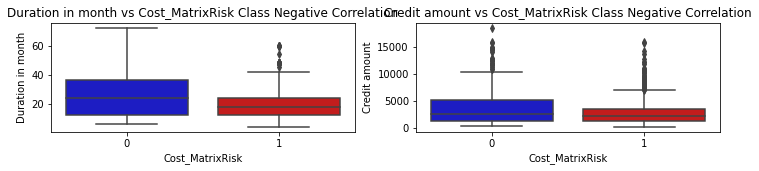

In [26]:
f, axes = plt.subplots(ncols=2, figsize=(12,2))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Cost_MatrixRisk", y="Duration in month", data=credit_data, palette=colors, ax=axes[0])
axes[0].set_title('Duration in month vs Cost_MatrixRisk Class Negative Correlation')

sns.boxplot(x="Cost_MatrixRisk", y="Credit amount", data=credit_data, palette=colors, ax=axes[1])
axes[1].set_title('Credit amount vs Cost_MatrixRisk Class Negative Correlation')

plt.show()

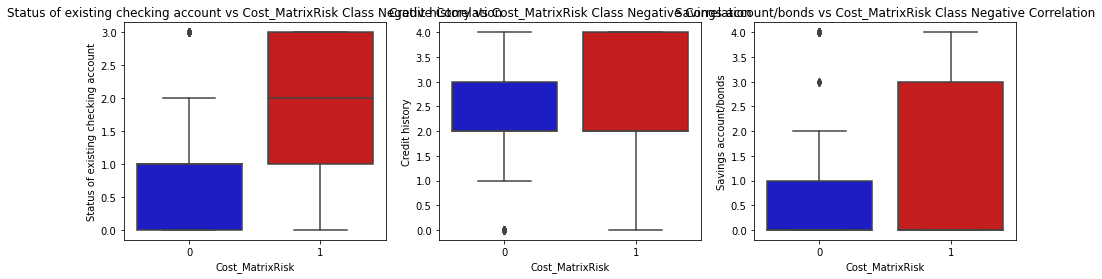

In [27]:
f, axes = plt.subplots(ncols=3, figsize=(16,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Cost_MatrixRisk", y="Status of existing checking account", data=credit_data, palette=colors, ax=axes[0])
axes[0].set_title('Status of existing checking account vs Cost_MatrixRisk Class Negative Correlation')

sns.boxplot(x="Cost_MatrixRisk", y="Credit history", data=credit_data, palette=colors, ax=axes[1])
axes[1].set_title('Credit history vs Cost_MatrixRisk Class Negative Correlation')


sns.boxplot(x="Cost_MatrixRisk", y="Savings account/bonds", data=credit_data, palette=colors, ax=axes[2])
axes[2].set_title('Savings account/bonds vs Cost_MatrixRisk Class Negative Correlation')

plt.show()

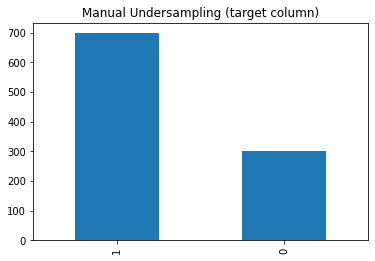

In [28]:
# manual undersampling
def undersample_manual(credit_data_df, index):
  credit_data_df = credit_data_df.sample(frac=1)
  # amount of unsafe classes 300 rows.
  unsafe_credit_data_df = credit_data_df.loc[credit_data_df['Cost_MatrixRisk'] == 1]
  non_unsafe_credit_data_df = credit_data_df.loc[credit_data_df['Cost_MatrixRisk'] == 0][:index]
  normal_distributed_credit_data_df = pd.concat([unsafe_credit_data_df, non_unsafe_credit_data_df])
  new_credit_data_df = normal_distributed_credit_data_df.sample(frac=1, random_state=42)
  return new_credit_data_df

credit_data_Usampling = undersample_manual(credit_data, 300)

# checking the distribution of our target variable
credit_data_Usampling['Cost_MatrixRisk'].value_counts().plot(kind='bar', title='Manual Undersampling (target column)')

Random over-sampling:
1    698
0    300
Name: Cost_MatrixRisk, dtype: int64


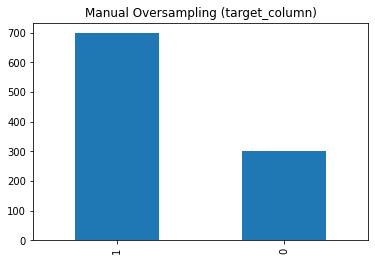

In [29]:
def oversample_manually(credit_data_df):
  # Class count
  count_class_0, count_class_1 = credit_data_df.Cost_MatrixRisk.value_counts()
  # Divide by class
  df_class_0 = credit_data_df[credit_data_df['Cost_MatrixRisk'] == 0]
  df_class_1 = credit_data_df[credit_data_df['Cost_MatrixRisk'] == 1]
  df_class_1_over = df_class_1.sample(count_class_0, replace=True)
  df_credit_data_over = pd.concat([df_class_0, df_class_1_over], axis=0)
  print('Random over-sampling:')
  print(df_credit_data_over.Cost_MatrixRisk.value_counts())

  df_credit_data_over.Cost_MatrixRisk.value_counts().plot(kind='bar', title='Manual Oversampling (target_column)')

  return df_credit_data_over

credit_data_Osampling = oversample_manually(credit_data)

In [30]:
## Imblearn

#here we are going to use various imblearn sampling techniques where we weill majorly focus on SMOTE


In [31]:
# importing various libraries inside imblearn
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE

def sample_imblearn(X, y, sampling):
  if sampling == 'under':
    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X, y)

  if sampling == 'over':
    rus = RandomOverSampler()
    X_rus, y_rus = rus.fit_resample(X, y)

  if sampling =='tomek':
      rus = TomekLinks()
      X_rus, y_rus = rus.fit_resample(X, y)

  if sampling == 'smote_under':
      rus = SMOTE(ratio='minority')
      X_rus, y_rus = rus.fit_resample(X, y)

  if sampling == 'smote_over':
      rsm = SMOTE(ratio='majority')
      X_rus, y_rus = rus.fit_resample(X, y)
  return X_rus, y_rus
# X, y = sample_imblearn(X, y, sampling):

# feature selection
X = credit_data.drop('Cost_MatrixRisk', axis=1)
y = credit_data['Cost_MatrixRisk']

X_smote_over, y_smote_over = sample_imblearn(X, y, 'over')
X_smote_under, y_smote_under = sample_imblearn(X, y, 'under')

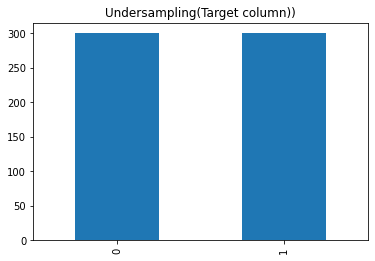

In [32]:
# visualizing the undersamplingsampling techniques
colors = ["#DF0101","#0101DF"]
y_smote_under.value_counts().plot(kind='bar', title='Undersampling(Target column))')

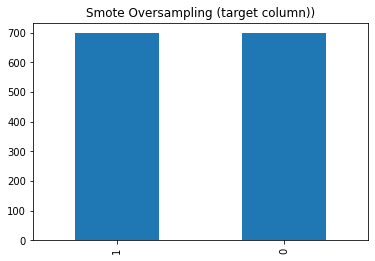

In [33]:
# visualizing the SMOTE oversamplingsampling techniques
y_smote_over.value_counts().plot(kind='bar', title='Smote Oversampling (target column))')

**Modeling**

Here we are going to try out various classical machine learning algorithms and see how they perform with both the oversampled and undersampled datasets and see on which cases overfitting is likely to occur or underfitting.

This can be judged by how well the trained models will be able to genaralise to the test data which it has never seen before 

In [34]:
# train_Usampling is from the manual random undersample data (fewer instances)
X_us = credit_data_Usampling.drop('Cost_MatrixRisk', axis=1)
y_us = credit_data_Usampling['Cost_MatrixRisk']
# train_Osampling is from the manual random Oversampled data (More instances)
X_os = credit_data_Osampling.drop('Cost_MatrixRisk', axis=1)
y_os = credit_data_Osampling['Cost_MatrixRisk']

In [35]:
# splitting our datasets
from sklearn.model_selection import train_test_split

# manual undersampling  --test_size = 0.15
X_train_mus, X_test_mus, y_train_mus, y_test_mus = train_test_split(X_us, y_us, test_size=0.15, random_state=42)

# manual oversampling  --test_size = 0.2
X_train_mos, X_test_mos, y_train_mos, y_test_mos = train_test_split(X_os, y_os, test_size=0.2, random_state=42)

# undersampling  --test_size = 0.2
X_train_sus, X_test_sus, y_train_sus, y_test_sus = train_test_split(X_smote_under, y_smote_under, test_size=0.15, random_state=42)


# Oversampling  --test_size = 0.2
X_train_sos, X_test_sos, y_train_sos, y_test_sos = train_test_split(X_smote_over, y_smote_over, test_size=0.2, random_state=42)
#

**Here we'll first start off by assessing the performance of a few baseline algorithms, This is to assess which algorithm performns well and at what scenario of sampled data. below is a dictionary of this classifiers, i.e from a basic logistic regressor to advanced gradient boosted algorithms such as XGBClassifier().**

In [36]:
# baseline models
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Extreem Gradient Boosting": XGBClassifier(),
    "Light Gradient Boosting": LGBMClassifier(),
    "Categorical Gradient Boosting": CatBoostClassifier(verbose=False)
}

In [37]:
# manual undersampling
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Undersampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_mus, y_train_mus)
    training_score = cross_val_score(classifier, X_train_mus, y_train_mus, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Oversampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_mos, y_train_mos)
    training_score = cross_val_score(classifier, X_train_mos, y_train_mos, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SMOTE Undersampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_sus, y_train_sus)
    training_score = cross_val_score(classifier, X_train_sus, y_train_sus, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SMOTE Oversampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for key, classifier in classifiers.items():
    classifier.fit(X_train_sos, y_train_sos)
    training_score = cross_val_score(classifier, X_train_sos, y_train_sos, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Undersampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Classifiers:  LogisticRegression training score of 75.0 % accuracy score
Classifiers:  KNeighborsClassifier training score of 62.0 % accuracy score
Classifiers:  SVC training score of 70.0 % accuracy score
Classifiers:  DecisionTreeClassifier training score of 67.0 % accuracy score
Classifiers:  RandomForestClassifier training score of 75.0 % accuracy score
Classifiers:  XGBClassifier training score of 76.0 % accuracy score
Classifiers:  LGBMClassifier training score of 77.0 % accuracy score
Classifiers:  CatBoostClassifier training score of 76.0 % accuracy score
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Manual Oversampling~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Classifiers:  LogisticRegression training score of 77.0 % accuracy score
Classifiers:  KNeighborsClassifier training score of 65.0 % accuracy score
Classifiers:  SVC training score of 70.0 % accuracy score
Classifiers:  DecisionTreeClassifier trai

We are going to select three best performing algorithms and tune them as well as plot their learning curves to see wether they are overfitting and later on compare the best with a neural network algorithm. This models are:

    Logisic Regressor
    K-nearest Neighbors Classifier
    Random Forest classifier
    Light Gradient Boosted Classifier

Here henceforth we are going to proceed with SMOTE oversampled training and validation sets

In [38]:
# renaming our data in form of arrays
X_train, X_test, y_train, y_test = X_train_sos.values, X_test_sos.values, y_train_sos.values, y_test_sos.values

In [39]:
# Hyper-parameter Tuning
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Random Forest Classifier
rf_params = {"max_features":['auto', 'sqrt'], "min_samples_split":[2, 5, 10],
             "min_samples_leaf":[1, 2, 4],  "bootstrap":[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)

# RF best estimator
grid_rf = grid_rf.best_estimator_

# LGBMClassifier Classifier
lgbm_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_lgbm = GridSearchCV(LGBMClassifier(), lgbm_params)
grid_lgbm.fit(X_train, y_train)

# tree best estimator
lgbm_clf = grid_lgbm.best_estimator_

In [40]:
# plotting learning curves
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Random Forest classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("LGBM Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

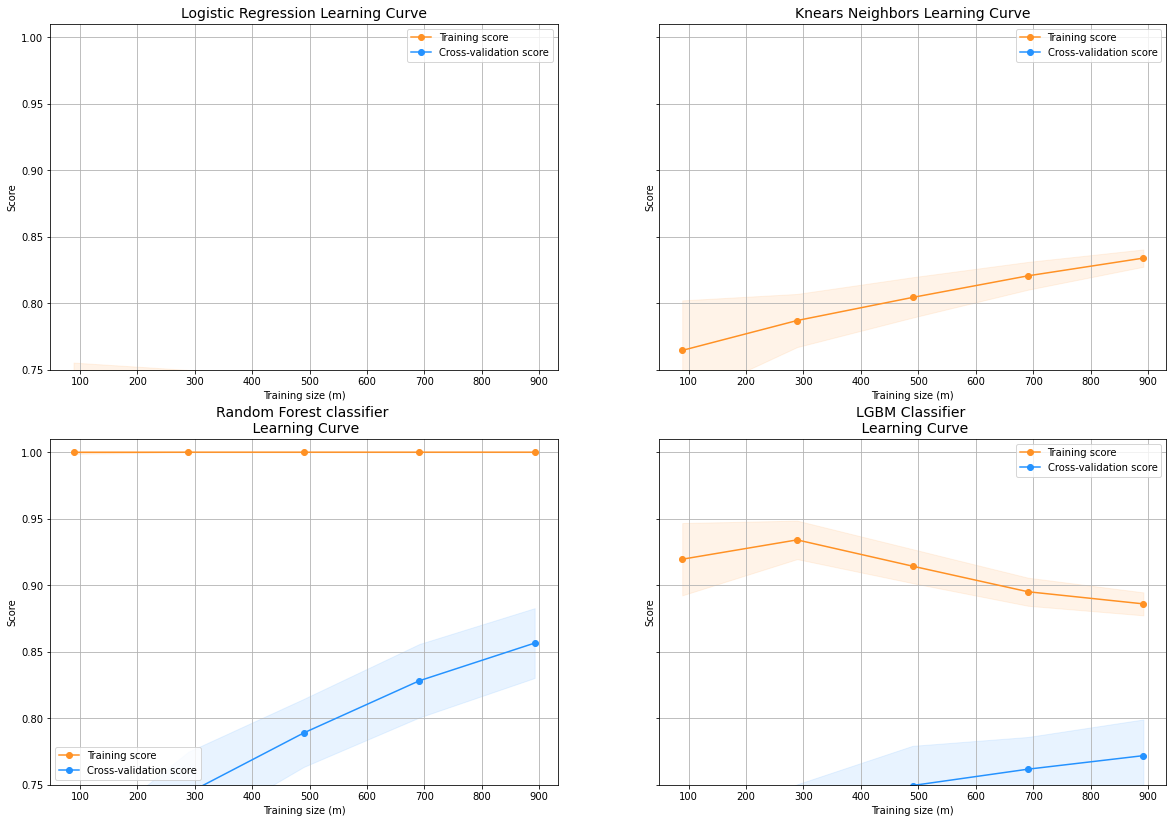

In [41]:
# calling the learning curve function
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, grid_rf, lgbm_clf, X_train, y_train, (0.75, 1.01), cv=cv, n_jobs=4)

Plotting an ROC Curve for the 4 best classifiers

In [42]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_test, y_test, cv=5)

rf_pred = cross_val_predict(grid_rf, X_test, y_test, cv=5,
                             )

lgbm_pred = cross_val_predict(lgbm_clf, X_test, y_test, cv=5)

In [43]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, knears_pred))
print('Random Forest Classifier: ', roc_auc_score(y_test, rf_pred))
print('LGBM Classifier: ', roc_auc_score(y_test, lgbm_pred))

Logistic Regression:  0.7562191611842105
KNears Neighbors:  0.606702302631579
Random Forest Classifier:  0.7288240131578947
LGBM Classifier:  0.713404605263158


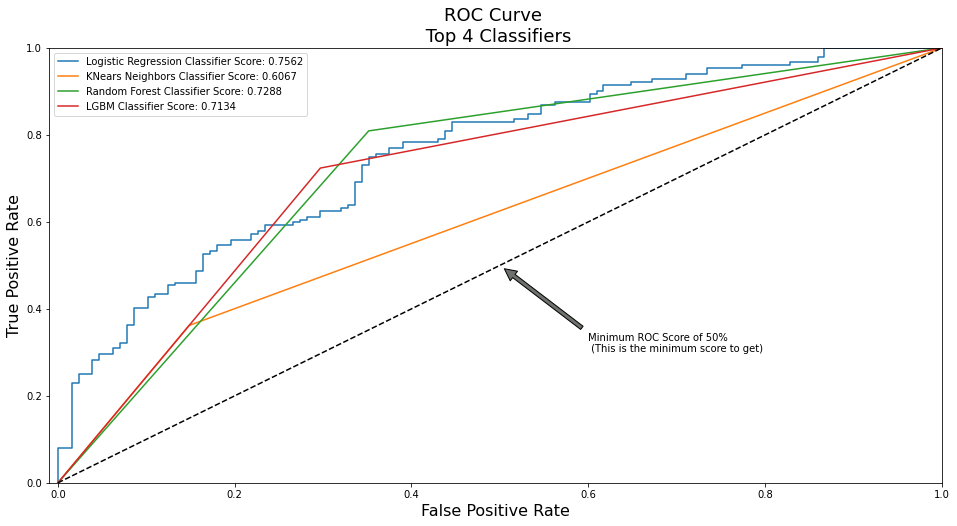

<Figure size 432x288 with 0 Axes>

In [44]:
# ROC Curve
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_pred)
lgbm_fpr, lgbm_tpr, lgbm_threshold = roc_curve(y_test, lgbm_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, rf_fpr, rf_tpr, lgbm_fpr, lgbm_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, knears_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
    plt.plot(lgbm_fpr, lgbm_tpr, label='LGBM Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lgbm_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, rf_fpr, rf_tpr, lgbm_fpr, lgbm_tpr)
plt.show()
plt.savefig('ROC Curve')

**Classification reports and final comparisons with neural nets**

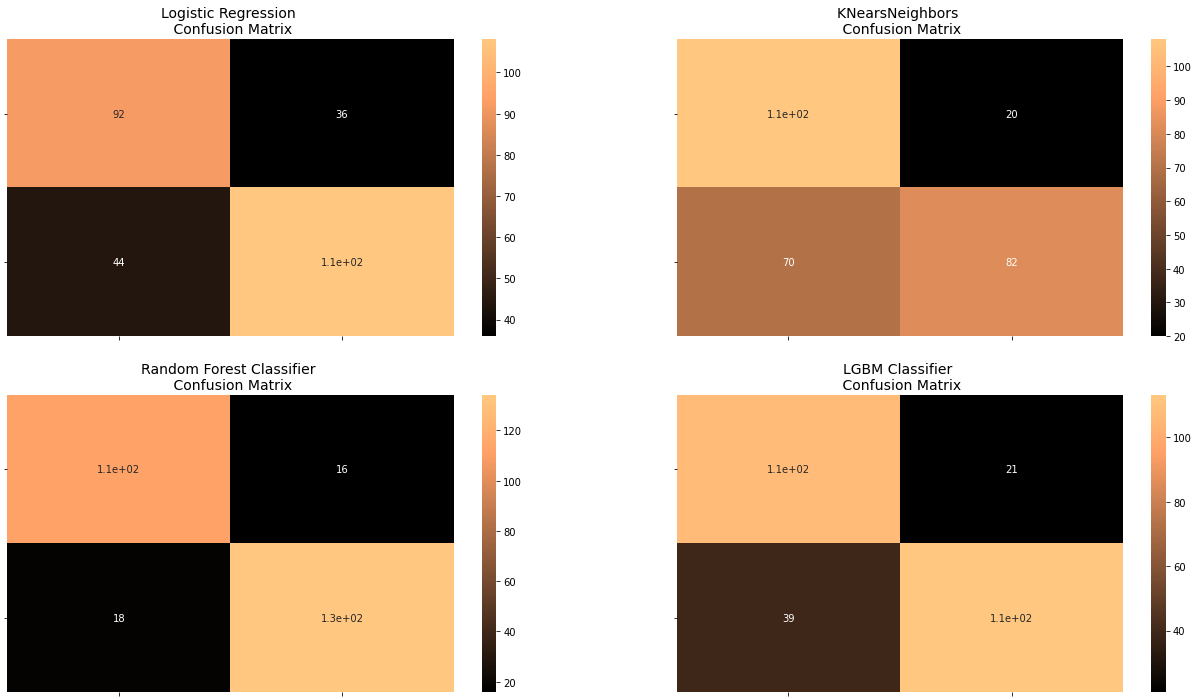

<Figure size 432x288 with 0 Axes>

In [45]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_lgbm = lgbm_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
rf_cf = confusion_matrix(y_test, y_pred_rf)
lgbm_cf = confusion_matrix(y_test, y_pred_lgbm)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(lgbm_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("LGBM Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()
plt.savefig('Confusion Matrix')

In [46]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_rf))

print('LGBM Classifier:')
print(classification_report(y_test, y_pred_lgbm))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       128
           1       0.75      0.71      0.73       152

    accuracy                           0.71       280
   macro avg       0.71      0.71      0.71       280
weighted avg       0.72      0.71      0.71       280

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71       128
           1       0.80      0.54      0.65       152

    accuracy                           0.68       280
   macro avg       0.71      0.69      0.68       280
weighted avg       0.71      0.68      0.67       280

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       128
           1       0.89      0.88      0.89       152

    accuracy                           0.88       280
   macro avg       0.88      0.88      0.88       280
weighted 

**Implementing SMOTE Using Deep learning**

In [47]:
# redefining our smote oversampled data
X_train_sos, X_test_sos, y_train_sos, y_test_sos = X_train_sos.values, X_test_sos.values, y_train_sos.values, y_test_sos.values

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
X = credit_data.drop('Cost_MatrixRisk',axis='columns')
y = credit_data['Cost_MatrixRisk']

In [50]:
smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(X, y)

y_smt.value_counts()

1    698
0    698
Name: Cost_MatrixRisk, dtype: int64

In [51]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [52]:
dnn_model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
#Fitting the model with training data
dnn_model.fit(X_train_sos, y_train_sos, validation_split=0.2, batch_size=300, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
3/3 - 3s - loss: 495.3058 - accuracy: 0.4933 - val_loss: 460.2458 - val_accuracy: 0.4732 - 3s/epoch - 890ms/step
Epoch 2/50
3/3 - 0s - loss: 443.1974 - accuracy: 0.4933 - val_loss: 412.2066 - val_accuracy: 0.4732 - 27ms/epoch - 9ms/step
Epoch 3/50
3/3 - 0s - loss: 396.0929 - accuracy: 0.4933 - val_loss: 364.2842 - val_accuracy: 0.4732 - 26ms/epoch - 9ms/step
Epoch 4/50
3/3 - 0s - loss: 346.7413 - accuracy: 0.4933 - val_loss: 316.8683 - val_accuracy: 0.4732 - 27ms/epoch - 9ms/step
Epoch 5/50
3/3 - 0s - loss: 299.6374 - accuracy: 0.4933 - val_loss: 269.5584 - val_accuracy: 0.4732 - 27ms/epoch - 9ms/step
Epoch 6/50
3/3 - 0s - loss: 252.5099 - accuracy: 0.4933 - val_loss: 222.3693 - val_accuracy: 0.4732 - 27ms/epoch - 9ms/step
Epoch 7/50
3/3 - 0s - loss: 206.3632 - accuracy: 0.4933 - val_loss: 175.1289 - val_accuracy: 0.4732 - 29ms/epoch - 10ms/step
Epoch 8/50
3/3 - 0s - loss: 160.1904 - accuracy: 0.4933 - val_loss: 127.8530 - val_accuracy: 0.4732 - 26ms/epoch - 9ms/step
Epoch 9

In [54]:
dnn_preds_smt = dnn_model.predict(X_test_mos)
dnn_preds_smt = np.round(dnn_preds_smt)

7/7 [==============================] - 0s 2ms/step


In [55]:
print(classification_report(y_test_mos,dnn_preds_smt))

              precision    recall  f1-score   support

           0       0.31      0.68      0.43        57
           1       0.76      0.40      0.52       143

    accuracy                           0.48       200
   macro avg       0.54      0.54      0.48       200
weighted avg       0.63      0.48      0.50       200



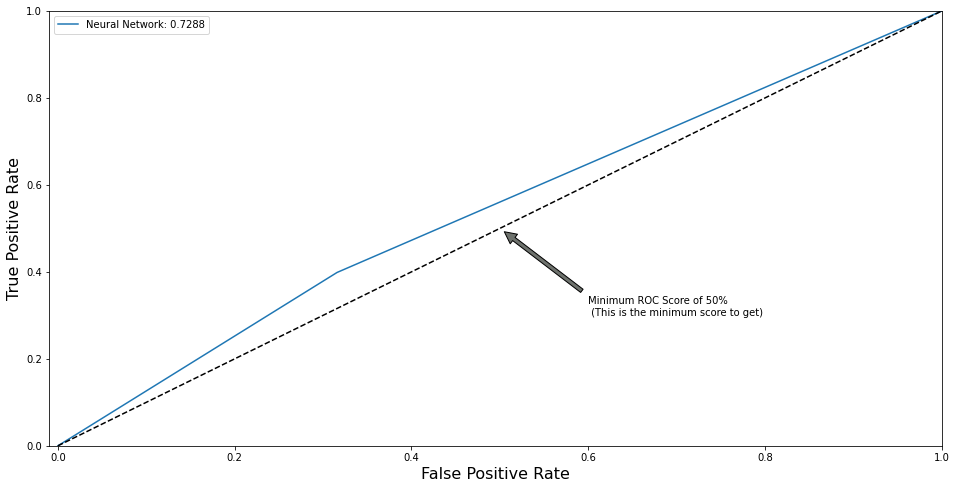

In [56]:
# ROC Curve
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test_mos, dnn_preds_smt)

def graph_roc_curve_multiple(rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.plot(rf_fpr, rf_tpr, label='Neural Network: {:.4f}'.format(roc_auc_score(y_test, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rf_fpr, rf_tpr)
plt.show()

In [57]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 57   0]
 [  0 143]]


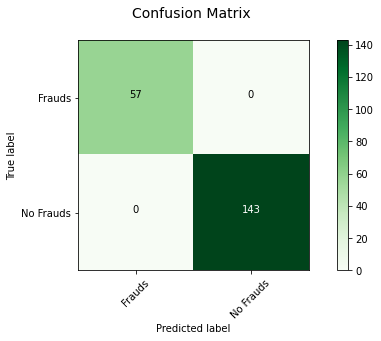

In [58]:
oversample_manual = confusion_matrix(y_test_mos, dnn_preds_smt)
actual_cm = confusion_matrix(y_test_mos, y_test_mos)
labels = ['Frauds', 'No Frauds']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n ", cmap=plt.cm.Greens)